#<center>Tugas Pengolahan Citra Digital (FFT)<center>

> Nama : Vivi Fitriyani

> NIM : 1306620050

> Kelas : Fisika B







##1. Mengimpor Gambar

In [1]:
#Mengiport modul yang akan digunakan 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cat 2.png to cat 2.png


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f8ad548c6d0>)

<Figure size 720x720 with 0 Axes>

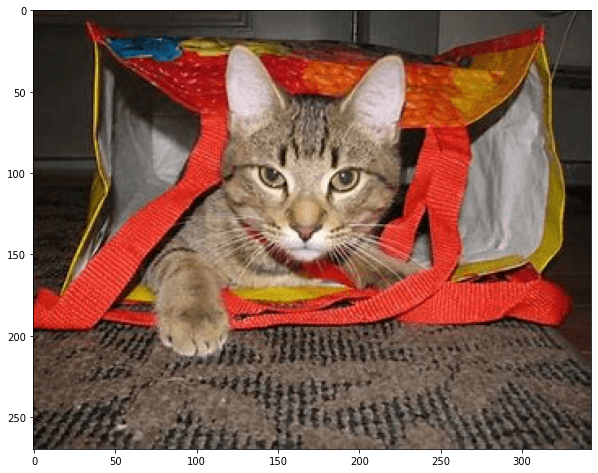

In [5]:
im = pylab.imread('cat 2.png').astype(float)
pylab.figure(figsize=(10,10))
pylab.figure(figsize = (10,10)),pylab.imshow(im)
#pylab.imshow(im, pylab.cm.gray), pylab.axis('off'), pylab.title('Originalimage'), pylab.show()

##2. Lakukan Transformasi FFT

In [6]:
im2 = rgb2gray(imread('cat 2.png'))
freq2 = fp.fft2(im2)
print('Nilai Matrix Awal :')
print(' ')
print(im2)
print(' ')
print(' ')
print('Nilai Matrix Setelah di transformasi :')
print(' ')
print(freq2)

Nilai Matrix Awal :
 
[[0.11727412 0.11727412 0.11727412 ... 0.21201765 0.18960431 0.18960431]
 [0.11727412 0.13630157 0.11727412 ... 0.18960431 0.18960431 0.18960431]
 [0.13630157 0.13630157 0.13630157 ... 0.17617294 0.17617294 0.17617294]
 ...
 [0.0335749  0.13413686 0.22489843 ... 0.23717608 0.15704039 0.15177255]
 [0.18960431 0.21201765 0.18960431 ... 0.27412196 0.23717608 0.23717608]
 [0.29745882 0.25824314 0.15177255 ... 0.23717608 0.21700275 0.21700275]]
 
 
Nilai Matrix Setelah di transformasi :
 
[[ 3.22540769e+04   -0.j         -4.32501088e+03 +554.91244356j
  -1.18765865e+03+2055.5392532j  ... -1.46038412e+03 -581.83613697j
  -1.18765865e+03-2055.5392532j  -4.32501088e+03 -554.91244356j]
 [-3.19537537e+03 -563.06566409j  1.69097921e+03+1010.64764021j
   7.75884308e+02-1570.46958246j ...  1.11821679e+03+1002.806673j
  -5.80078920e+02  +56.45835649j -2.33868132e+02 +726.70342745j]
 [-3.05773410e+02+1006.50510747j -2.57428498e+02 +362.18928013j
   1.44401307e+02 +743.53977933j 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


##3. Plot FFT specrum dan phase FFT

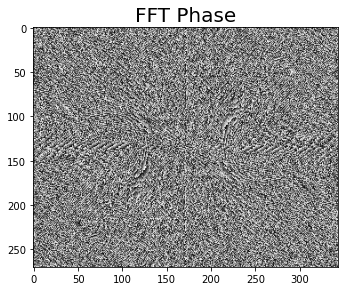

<Figure size 432x288 with 0 Axes>

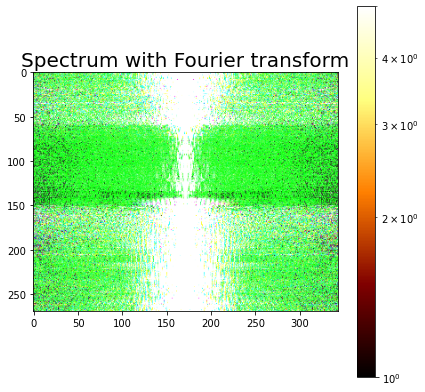

In [7]:
pylab.figure(figsize=(12,10))
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq2)),cmap='gray')
pylab.title('FFT Phase', size=20)
from scipy import fftpack
from matplotlib.colors import LogNorm
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
 pylab.figure(figsize=(15,15))
 pylab.subplot(2,2,2), pylab.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap=pylab.cm.afmhot), pylab.colorbar()
pylab.figure(), plot_spectrum(fftpack.fftshift(im_fft))
pylab.title('Spectrum with Fourier transform', size=20)
pylab.show()

##4.Transformasi balik FFT

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f8ad51685d0>)

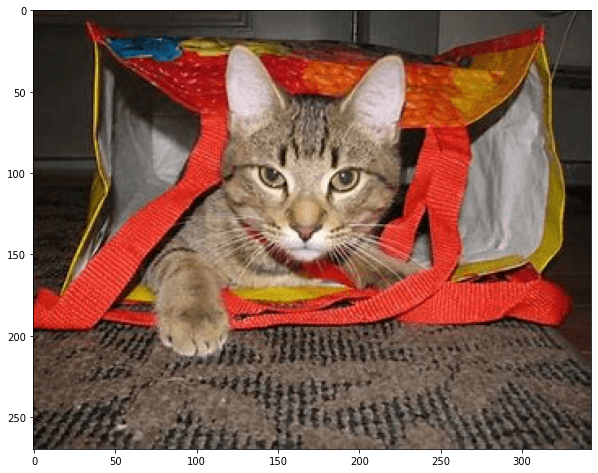

In [8]:
im_new = fp.ifft2(im_fft).real
pylab.figure(figsize = (10,10)),pylab.imshow(im_new)

##5. Buat Threshold di variasikan kemudian melakukan transformasi balik

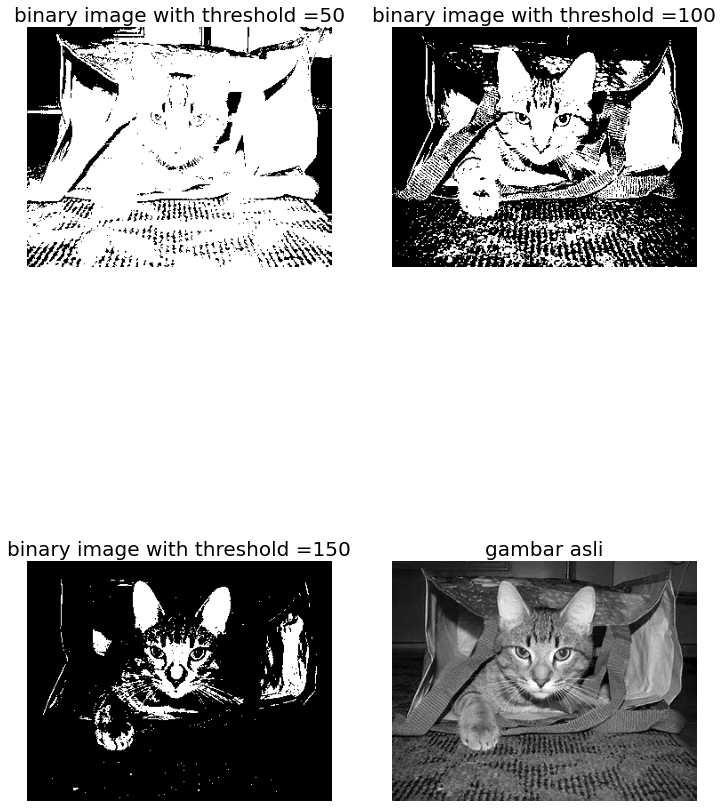

In [12]:
im = Image.open('cat 2.png').convert('L')
def plot_image(image, title=''):
 pylab.title(title, size=20), pylab.imshow(image)
 pylab.axis('off') # comment this line if you want axis ticks
pylab.figure(figsize=(12,18))
pylab.gray()
pylab.subplot(224), plot_image(im, 'gambar asli'), pylab.axis('off')
th = [0, 50, 100, 150, 200]
for i in range(1, 4):
 im1 = im.point(lambda x: x > th[i])
 pylab.subplot(2,2,i), plot_image(im1, 'binary image with threshold =' +str(th[i]))
pylab.show()